In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ecto_network import EctoNetwork

In [3]:
def run_sim(num_cb=10, num_rp=10, density_cb=.3, density_rp=.3, density_rp_cb=1, density_cb_rp=1, gc=100):
    """simulation function"""
    # cb edges
    edges_cb = []
    for i in range(num_cb):
        for j in range(i+1, num_cb):
            if np.random.rand() < density_cb and (i, j) not in edges_cb:
                edges_cb.append((i, j))

    # rp edges
    edges_rp = []
    for i in range(num_rp):
        for j in range(i+1, num_rp):
            if np.random.rand() < density_rp and (i, j) not in edges_rp:
                edges_rp.append((i, j))

    # cross edges
    edges_rp_cb = []
    for i in range(num_cb):
        for j in range(num_rp):
            if np.random.rand() < density_rp_cb:
                edges_rp_cb.append((i, j))
    edges_cb_rp = []
    for i in range(num_rp):
        for j in range(num_cb):
            if np.random.rand() < density_cb_rp:
                edges_cb_rp.append((i, j))
    
    # build and run network model
    ntwk = EctoNetwork(num_cb=num_cb,
                       num_rp=num_rp,
                       pm_cb=range(num_cb),
                       edges_cb=edges_cb,
                       edges_rp=edges_rp,
                       gc=gc,
                       edges_rp_cb=edges_rp_cb,
                       edges_cb_rp=edges_cb_rp)
    ntwk.run()
    ntwk.cbnet.disp()
    ntwk.rpnet.disp()
    return ntwk

100%|█████████████████████████████████████████| 99999/99999 [00:12<00:00, 8136.73it/s]


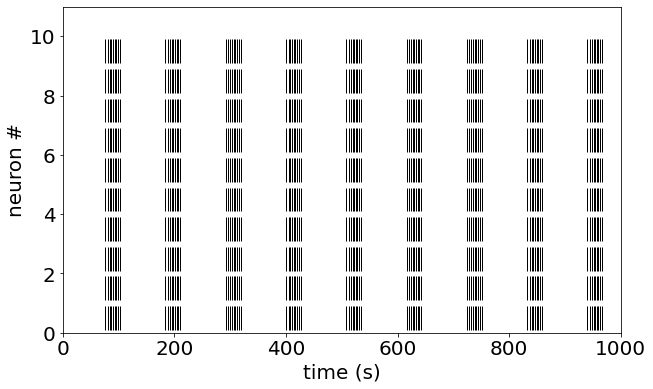

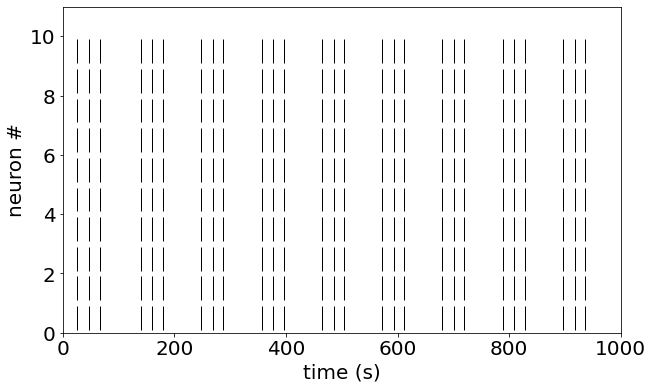

In [4]:
ntwk = run_sim(density_rp_cb=0, density_cb_rp=.1)

100%|█████████████████████████████████████████| 99999/99999 [00:13<00:00, 7168.14it/s]


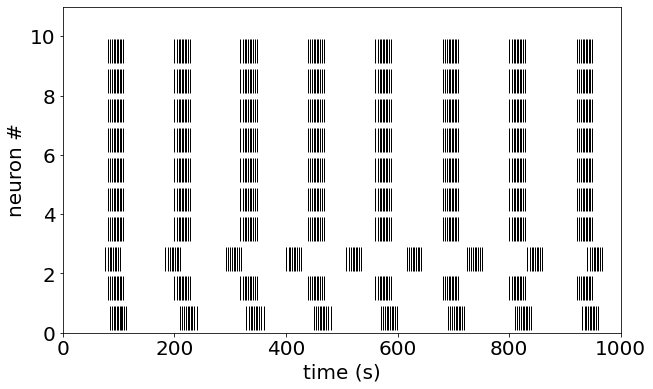

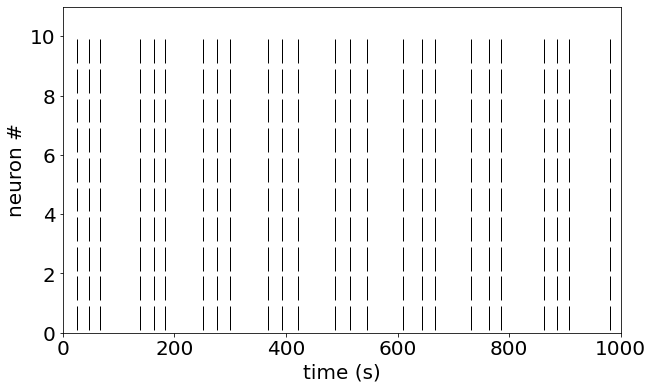

In [5]:
ntwk = run_sim(density_rp_cb=.1, density_cb_rp=.1)

100%|█████████████████████████████████████████| 99999/99999 [00:17<00:00, 5811.24it/s]


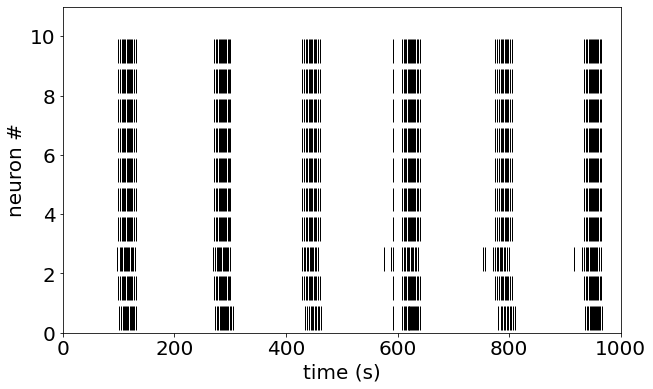

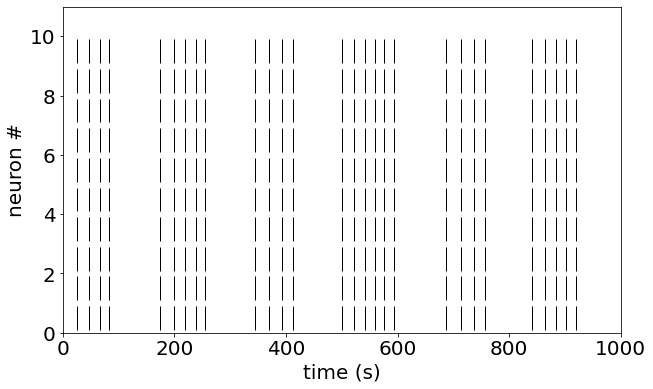

In [6]:
ntwk = run_sim(density_rp_cb=.5, density_cb_rp=.1)

100%|█████████████████████████████████████████| 99999/99999 [00:21<00:00, 4702.12it/s]


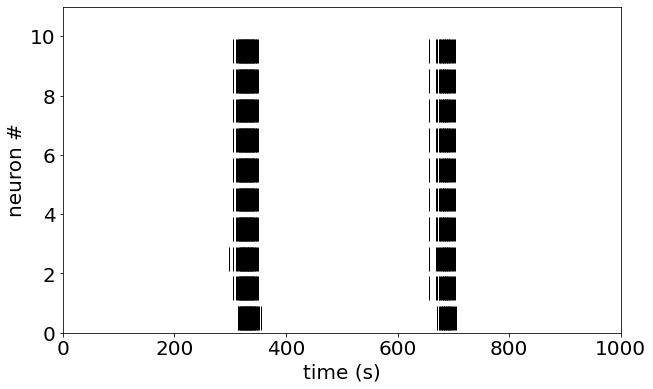

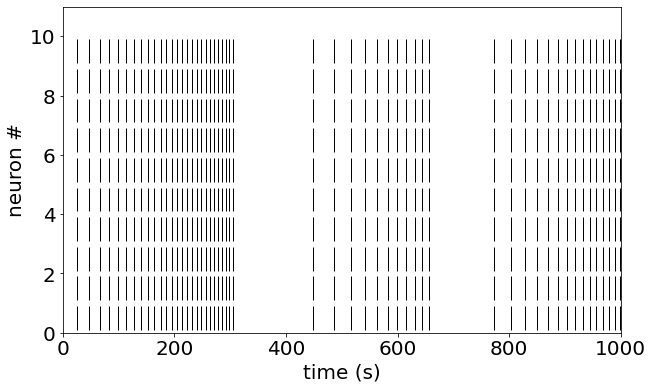

In [7]:
ntwk = run_sim(density_rp_cb=.85, density_cb_rp=.1)

100%|█████████████████████████████████████████| 99999/99999 [00:22<00:00, 4437.96it/s]


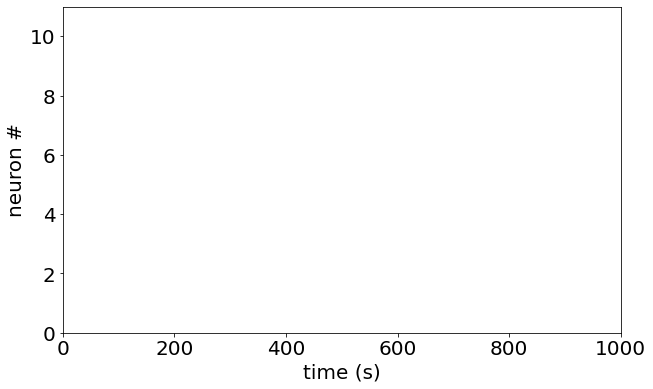

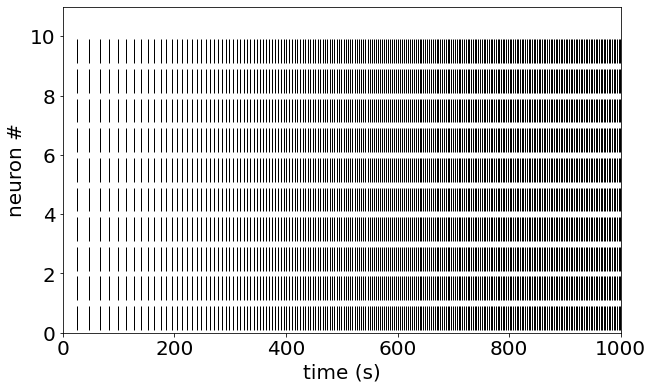

In [8]:
ntwk = run_sim(density_rp_cb=1, density_cb_rp=.1)

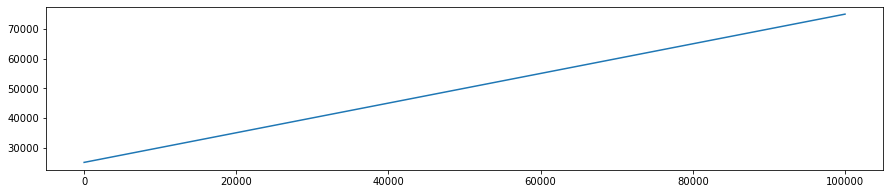

In [9]:
plt.figure(figsize=(15,3))
plt.plot(ntwk.cbnet.neurons[9].sigma_w_train)
plt.show()